# 2章 教師あり学習
## 2.3 教師あり学習とアルゴリズム
### 2.3.1 サンプルデータセット

In [3]:
from preamble import *

/Users/Doarakko/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/Doarakko/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/Doarakko/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


X.shape: (26, 2)


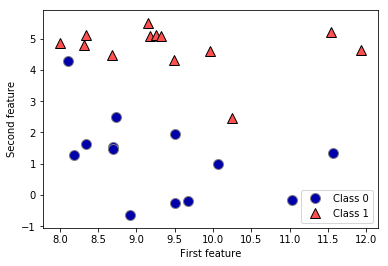

In [5]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)

plt.xlabel("First feature")
plt.ylabel("Second feature")

print('X.shape: {}'.format(X.shape))

Text(0,0.5,'Target')

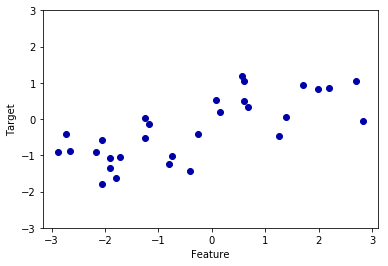

In [12]:
X, y = mglearn.datasets.make_wave(n_samples=30)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

##### 乳癌データセット

In [13]:
from sklearn.datasets import load_breast_cancer

In [15]:
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [16]:
print(cancer.data.shape)

(569, 30)


In [21]:
for n, v in zip(cancer.target_names, np.bincount(cancer.target)):
    print(n, v)

malignant 212
benign 357


##### Reference
- [np.bincount](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.bincount.html)

In [22]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

##### 1970年代のボストン近郊の住宅地の中央値を予測

In [25]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [26]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

### 2.3.2 k-最近傍法
#### 2.3.2.1 k-最近傍法によるクラス分類

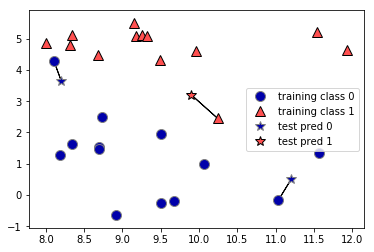

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

- k >= 2: 多数決 

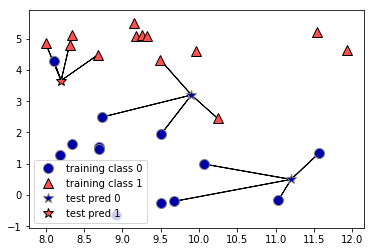

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [14]:
print(clf.predict(X_test))

[1 1 1 0 1 0 1]


In [15]:
clf.score(X_test, y_test)

1.0

#### 2.3.2.2 KNeighborsClassifierの解析

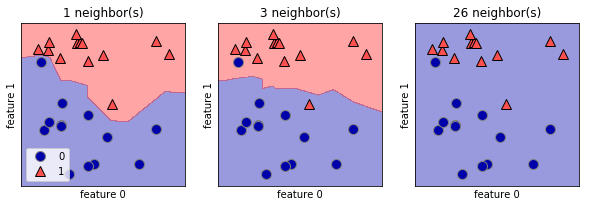

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)

    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")    
axes[0].legend(loc=3)

##### Interpretation
k が大きくなるほど境界線がなめらかになる

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=72)

In [29]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

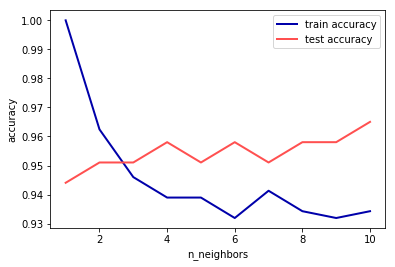

In [30]:
plt.plot(neighbors_settings, training_accuracy, label='train accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()

#### 2.3.2.3 k-近傍回帰

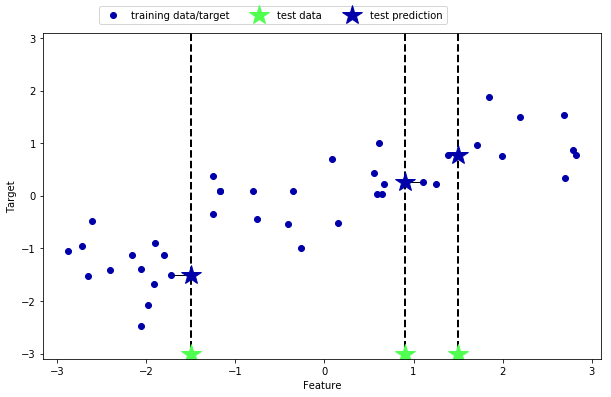

In [32]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

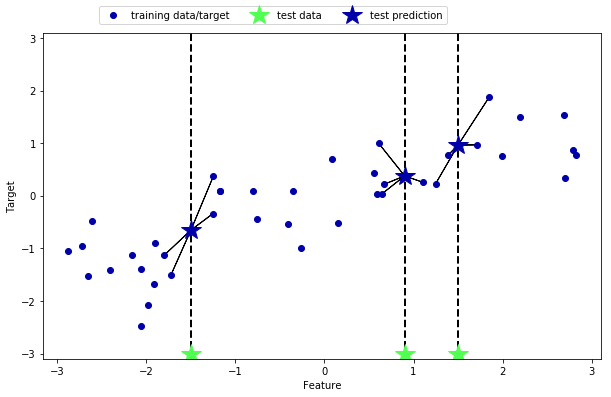

In [34]:
mglearn.plots.plot_knn_regression(n_neighbors=4)

In [36]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

reg = KNeighborsRegressor(n_neighbors=4)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=4, p=2,
          weights='uniform')

- 回帰予測器は`R^2`スコアを返す

In [37]:
reg.score(X_test, y_test)

0.6977831072043478

#### 2.3.3.1 KNeighborsRegressorの解析

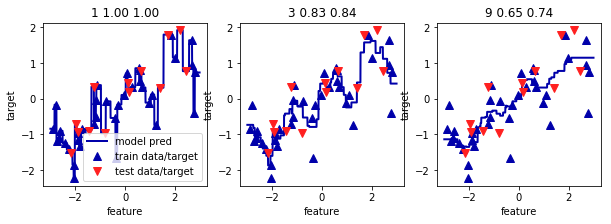

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X, y)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title('{} {:.2f} {:.2f}'.format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")    
axes[0].legend(["model pred", "train data/target", "test data/target"], loc="best")

##### Interpretation
- k = 1: 予測が不安定
    - 予測が学習データの各点を通っている
- k = 3, 9: 予測はなめらかだが、学習データへの適合度は低い

### 2.3.3 線形モデル
#### 2.3.3.1 線形回帰モデルによる回帰

w[0]: 0.393906  b: -0.031804


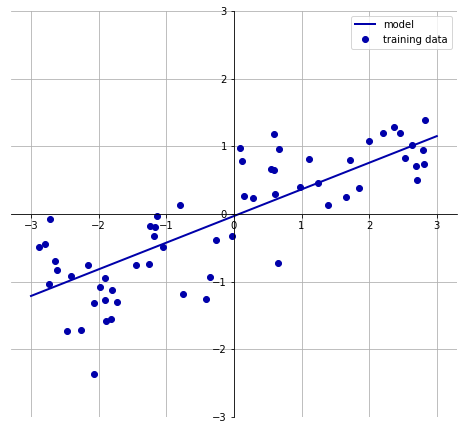

In [48]:
mglearn.plots.plot_linear_regression_wave()

#### 2.3.3.2 線形回帰(通常最小二乗法)

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [49]:
X, y = mglearn.datasets.make_wave(n_samples=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [52]:
lr = LinearRegression().fit(X_train, y_train)

In [53]:
print('lr.coef_: {}'.format(lr.coef_))
print('lr.intercept_: {}'.format(lr.intercept_))

lr.coef_: [0.426]
lr.intercept_: 0.032497647029336565


訓練セットとテストセットのスコア

In [54]:
print('train score: {}'.format(lr.score(X_train, y_train)))
print('test score: {}'.format(lr.score(X_test, y_test)))

train score: 0.6196251554724519
test score: 0.502664766727509


##### Interpretation
訓練セットとテストセットのスコアが近いため過剰適合ではない

In [55]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print('train score: {}'.format(lr.score(X_train, y_train)))
print('test score: {}'.format(lr.score(X_test, y_test)))

train score: 0.9523526436864238
test score: 0.6057754892935481


#### 2.3.3.3 リッジ回帰

In [56]:
from sklearn.linear_model import Ridge

In [57]:
ridge = Ridge().fit(X_train, y_train)
print('train score: {}'.format(ridge.score(X_train, y_train)))
print('test score: {}'.format(ridge.score(X_test, y_test)))

train score: 0.8860578560395835
test score: 0.7527139600306949


##### Interpretation
リッジ回帰は制約が強いため, 線形回帰よりも過学習していない

In [58]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('train score: {}'.format(ridge10.score(X_train, y_train)))
print('test score: {}'.format(ridge10.score(X_test, y_test)))

train score: 0.7883461511233251
test score: 0.6358967327447731


In [59]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('train score: {}'.format(ridge01.score(X_train, y_train)))
print('test score: {}'.format(ridge01.score(X_test, y_test)))

train score: 0.9285782082010736
test score: 0.7717933688844977


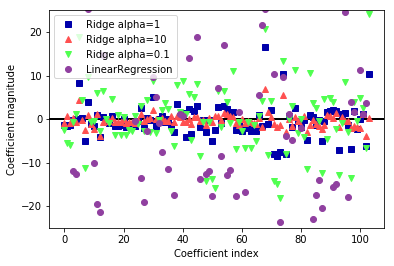

In [60]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

##### Interpretation
- x軸: coef_
- y軸: 特徴量に対応する係数の数値  
- x=0 は最初の特徴, x=1 は2番目の特徴に対する係数  
- alpha=10 は制約が強く0付近  
- alpha=1, 0.1は制約が弱く0から離れている

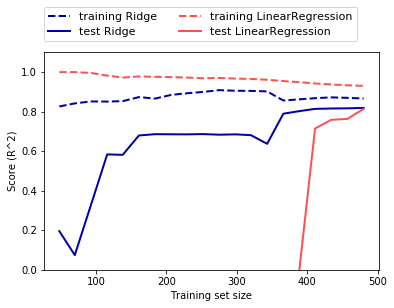

In [61]:
mglearn.plots.plot_ridge_n_samples()

##### Interpretation
- リッジ回帰は正則化が行われているため, 訓練スコアは常に線形回帰よりも低い
    - テストスコアはリッジ回帰のほうが高い
- 線形回帰では訓練スコアが常に低下
- 線形回帰はデータサイズが小さいとまったく予測ができていない

#### 2.3.3.4 Lasso

In [63]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print('train score: {}'.format(lasso.score(X_train, y_train)))
print('test score: {}'.format(lasso.score(X_test, y_test)))
print('number of feature: {}'.format(np.sum(lasso.coef_ != 0)))

train score: 0.29323768991114596
test score: 0.20937503255272272
number of feature: 4


##### Interpretation
- 特徴が4つしか使われれていない
    - alphaを小さくして正則化を弱める

In [66]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('train score: {}'.format(lasso001.score(X_train, y_train)))
print('test score: {}'.format(lasso001.score(X_test, y_test)))
print('number of feature: {}'.format(np.sum(lasso001.coef_ != 0)))

train score: 0.8965069559751291
test score: 0.7656489887843523
number of feature: 33


In [67]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('train score: {}'.format(lasso00001.score(X_train, y_train)))
print('test score: {}'.format(lasso00001.score(X_test, y_test)))
print('number of feature: {}'.format(np.sum(lasso00001.coef_ != 0)))

train score: 0.951061043618126
test score: 0.6403098994160565
number of feature: 94


##### Interpretation
正則化を弱めすぎたことで過剰適合

Text(0,0.5,'Coefficient magnitude')

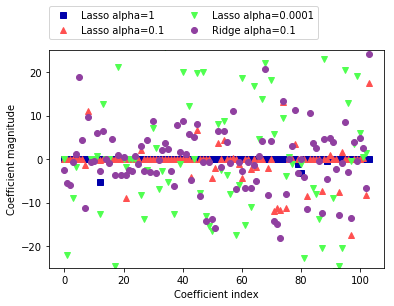

In [69]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.1")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

#### 2.3.3.5 クラス分類のための線形モデル

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

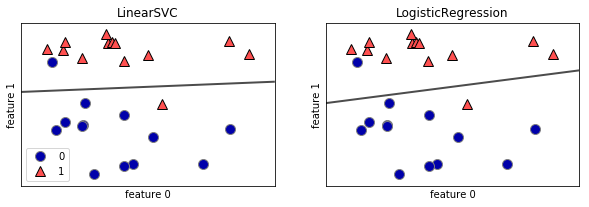

In [9]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')    
axes[0].legend()

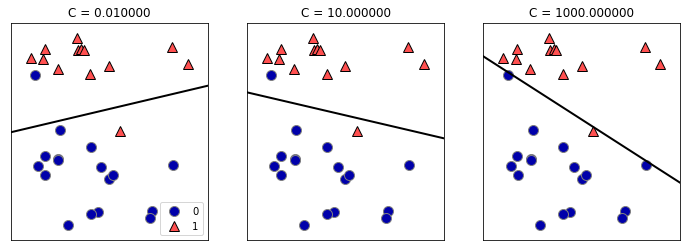

In [10]:
mglearn.plots.plot_linear_svc_regularization()

LogisticRegression を cancer データセットを使って詳細に解析

In [11]:
from sklearn.datasets import load_breast_cancer

In [13]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=41)

logreg = LogisticRegression().fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9577464788732394
0.951048951048951


In [14]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))

0.9765258215962441
0.965034965034965


In [15]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print(logreg001.score(X_train, y_train))
print(logreg001.score(X_test, y_test))

0.9342723004694836
0.9440559440559441


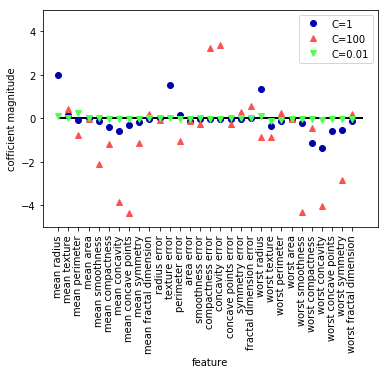

In [18]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('feature')
plt.ylabel('cofficient magnitude')
plt.legend()

L1正則化を使用

0.001 0.9061032863849765
0.001 0.9440559440559441
1 0.960093896713615
1 0.958041958041958
100 0.9929577464788732
100 0.972027972027972


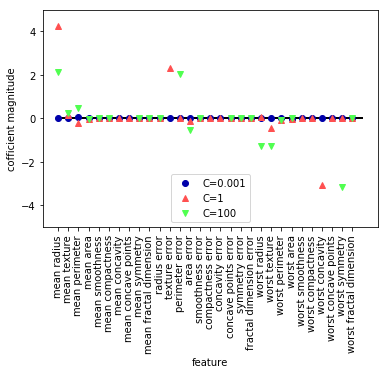

In [21]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print(C, lr_l1.score(X_train, y_train))
    print(C, lr_l1.score(X_test, y_test))
    plt.plot(lr_l1.coef_.T, marker, label='C={}'.format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('feature')
plt.ylabel('cofficient magnitude')
plt.legend()

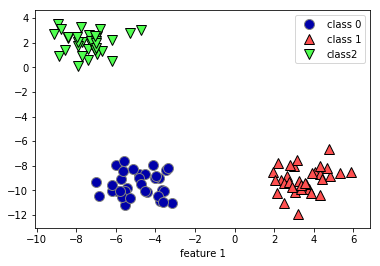

In [22]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=41)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.xlabel("feature 1")
plt.legend(["class 0", "class 1", "class2"])

In [24]:
linear_svm = LinearSVC().fit(X, y)
print(linear_svm.coef_.shape)
print(linear_svm.intercept_.shape)

(3, 2)
(3,)


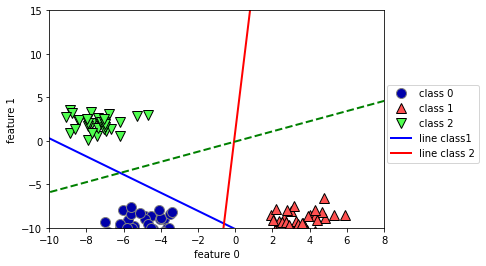

In [25]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.xlim(-10, 8)
plt.ylim(-10, 15)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'line class1', 'line class 2'], loc=(1.01, 0.3))

##### Interpretation
中央の三角形に属するデータは, 最も近い直線のクラスに分類される

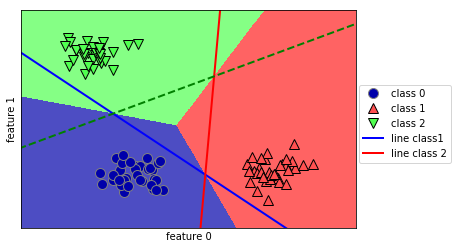

In [27]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(['class 0', 'class 1', 'class 2', 'line class1', 'line class 2'], loc=(1.01, 0.3))